In [1]:
from scipy.ndimage.interpolation import map_coordinates, zoom

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import struct
import scipy.ndimage
from scipy.ndimage.interpolation import zoom as zoom
from scipy.ndimage.interpolation import map_coordinates

import torch
import torch.nn as nn
import torch.nn.functional as F

print(torch.__version__)

1.9.0a0+gitdfbd030


In [2]:
!nvidia-smi

Tue Dec 21 16:21:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 495.29.05    CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:3B:00.0 Off |                  N/A |
|  0%   81C    P2   248W / 250W |   7758MiB / 11019MiB |     93%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:5E:00.0 Off |                  N/A |
|  0%   

In [3]:
import os
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

In [5]:
import sys
import time
from scipy.ndimage import distance_transform_edt as edt

A = torch.ones(64,64).cuda()
A.requires_grad = True
A.sum().backward()
sys.path.append('./voxelmorph/pytorch/')
# import losses
# print(losses.mind_loss)

def gpu_usage():
    print('gpu usage (current/max): {:.2f} / {:.2f} GB'.format(torch.cuda.memory_allocated()*1e-9, torch.cuda.max_memory_allocated()*1e-9))

    
import os
import pandas as pd
from scipy.ndimage.interpolation import zoom

In [6]:
folder_t1 = '/data_supergrover1/hansen/temp/crossMoDa/preprocessed/resampled/0.5mm/crop/source_training/'
folder_t1 = '/share/data_supergrover1/hansen/temp/crossMoDa/preprocessed_new/resampled/fixed_crop/source_training/'
files = sorted(os.listdir(folder_t1))
print(len(files))
count = 0
img2d = torch.empty(0,1,128,128)#96,96)
seg2d = torch.empty(0,128,128).long()#96,96).long()
seg_all = torch.zeros(2,192)
#slices = torch.zeros(2,96)
for i,f in enumerate(files):
    if(i%20==19):
        print(i,'/',len(files))
    if('128' in f):
        continue
    if('Label_l' in f):#Label_lTumourCrop' in f):
        #35:65
        fsplit = f.split('_')
        f1 = 'crossmoda_'+fsplit[1]+'_ceT1_l.nii.gz'#'_ceT1_lTumourCrop.nii.gz'
        seg = torch.from_numpy(nib.load(folder_t1+f).get_fdata()).long().contiguous()
        if((seg==1).sum()==0):
            print(i,'no tumour')
        if(len(seg.unique())!=3):
            continue
        if(seg.shape[0]==0):
            continue
        seg_all[0] += (seg==1).sum([0,1])
        
        seg_all[1] += (seg==2).sum([0,1])
        seg2d = torch.cat((seg2d,seg[:,:,65:135].permute(2,0,1)),0)
        img = torch.from_numpy(nib.load(folder_t1+f1).get_fdata()).float().contiguous()
        img2d = torch.cat((img2d,img[:,:,65:135].unsqueeze(0).permute(3,0,1,2)),0)
    if('Label_r' in f):#'Label_rTumourCrop' in f):
        #35:65
        fsplit = f.split('_')
        f1 = 'crossmoda_'+fsplit[1]+'_ceT1_r.nii.gz'#'_ceT1_rTumourCrop.nii.gz'
        seg = torch.from_numpy(nib.load(folder_t1+f).get_fdata()).long().contiguous()
        if((seg==1).sum()==0):
            print(i,'no tumour')
        if(len(seg.unique())!=3):
            continue
        if(seg.shape[0]==0):
            continue
        seg_all[0] += (seg==1).sum([0,1])
        seg_all[1] += (seg==2).sum([0,1])
        seg2d = torch.cat((seg2d,seg[:,:,65:135].flip(0).permute(2,0,1)),0)
        img = torch.from_numpy(nib.load(folder_t1+f1).get_fdata()).float().contiguous()
        img2d = torch.cat((img2d,img[:,:,65:135].flip(0).unsqueeze(0).permute(3,0,1,2)),0)
        
        #if(len(seg.unique())==3):
        #    count += 1
        #    slices[0] += (seg==1).sum([0,1])
        #    slices[1] += (seg==2).sum([0,1])
print(seg2d.shape)
#print(count)
#plt.plot(slices[0])
#plt.show()#

#plt.plot(slices[1])
#plt.show()

420
0 no tumour
13 no tumour
17 no tumour
19 / 420
21 no tumour
25 no tumour
28 no tumour
32 no tumour
37 no tumour
39 / 420
41 no tumour
52 no tumour
59 / 420
60 no tumour
69 no tumour
73 no tumour
79 / 420
84 no tumour
93 no tumour
96 no tumour
99 / 420
104 no tumour
109 no tumour
112 no tumour
119 / 420
132 no tumour
136 no tumour
139 / 420
140 no tumour
148 no tumour
156 no tumour
159 / 420
161 no tumour
179 / 420
184 no tumour
188 no tumour
193 no tumour
196 no tumour
199 / 420
200 no tumour
205 no tumour
208 no tumour
212 no tumour
216 no tumour
219 / 420
221 no tumour
225 no tumour
236 no tumour
239 / 420
244 no tumour
249 no tumour
253 no tumour
257 no tumour
259 / 420
261 no tumour
279 / 420
293 no tumour
299 / 420
304 no tumour
309 no tumour
312 no tumour
316 no tumour
319 / 420
325 no tumour
328 no tumour
332 no tumour
337 no tumour
339 / 420
340 no tumour
348 no tumour
352 no tumour
356 no tumour
359 / 420
365 no tumour
369 no tumour
373 no tumour
377 no tumour
379 / 420
38

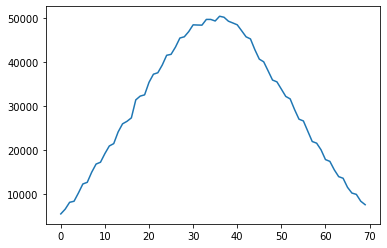

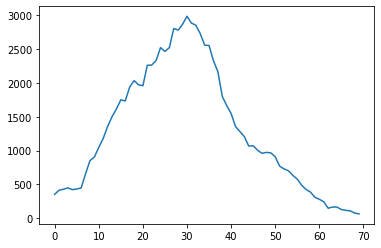

In [7]:
import matplotlib.pyplot as plt
#plt.plot((seg2d_t2==1).view(60,-1,128**2).sum([0,2]))
plt.plot((seg2d==1).view(147,-1,128**2).sum([0,2]))

plt.show()
#plt.plot((seg2d_t2==2).view(60,-1,128**2).sum([0,2]))
plt.plot((seg2d==2).view(147,-1,128**2).sum([0,2]))


#plt.plot(seg_all[1,65:135])

In [9]:
import matplotlib.pyplot as plt
import matplotlib
def color_rgb(image,segment):
    cmap = matplotlib.cm.get_cmap('Set1')
    colors = torch.cat((torch.zeros(1,3),torch.from_numpy(cmap(np.linspace(0,1,9))[:,:3]).float()),0)
    #'red','blue','green','purple','orange','yellow','brown','pink','gray'
    colors = colors[torch.tensor([0,2,3,8,1,3]).long(),:]
    #colors = colors[torch.tensor([0,6,7,1,2,8,3,4,9]).long(),:]
    colors[-1,:] = torch.tensor([235,113,16])/255 
    seg_rgb = colors[segment]

    img_rgb = image.unsqueeze(2).repeat(1,1,3)
    seg_rgb.view(-1,3)[segment.view(-1)==0,:] = img_rgb.view(-1,3)[segment.view(-1)==0,:]
    return seg_rgb





In [10]:
#create T1 dataset
img256 = img2d.cuda()/1000-1
#img256_t2 = img2d_t2.cuda()/500-1


#version2 (histogram as input)
#img256 = (img2d.cuda()-torch.linspace(-200,2200,16).cuda().view(1,-1,1,1)).pow(2).mul(-0.000025).exp()
#img256_t2 = (img2d_t2.cuda()-torch.linspace(-200,1200,16).cuda().view(1,-1,1,1)).pow(2).mul(-0.000025).exp()

seg256 = seg2d.cuda()
#seg256_pseudo = seg2d_pseudo.cuda()


#seg256_t2 = seg2d_t2.cuda()


def countParameters(model):
    model_parameters = filter(lambda p: p.requires_grad, model.parameters())
    params = sum([np.prod(p.size()) for p in model_parameters])
    return params
#print('#params',countParameters(model))

#print('#params',countParameters(all_conv))
torch.set_printoptions(precision=3)

In [11]:
weight = 1/(torch.bincount(seg256.reshape(-1).long())).float().pow(.35)
weight /= weight.mean()
print(weight)

tensor([0.153, 0.709, 2.138], device='cuda:0')


In [11]:
from vision_utils import *

model = lraspp_mobilenet_v3_large()
model.backbone['0'][0] = nn.Conv2d(1,16,3,stride=1,padding=1)#,bias=False)
#model.classifier = ASPP(960, [1,2,4,6,12])
model.classifier.low_classifier = nn.Conv2d(40,3,1)
model.classifier.high_classifier = nn.Conv2d(128,3,1)
#model.load_state_dict(torch.load('crossmoda_t2_mobile_target.pth'))
model.cuda()

#DeepLabV3 MobileNetV3-Large



LRASPP(
  (backbone): IntermediateLayerGetter(
    (0): ConvBNActivation(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): ConvBNActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): Identity()
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 

In [12]:

#train on t1 + DA-loss
import time
from torch.utils.checkpoint import checkpoint
t0 = time.time()
run_loss = torch.zeros(7000)

#smap = torch.tensor([0,1,0,2,0,3]).long().cuda()
optimizer = torch.optim.AdamW(list(model.parameters()),lr=0.001)#0.002
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer,500,2)
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer,1000,0.5)
scaler = torch.cuda.amp.GradScaler()
da_loss = torch.tensor([0])
for i in range(7000):
    if(i==3500): #complete restart
        optimizer = torch.optim.AdamW(list(model.parameters()),lr=0.001)#0.002
        scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer,500,2)


    #idx2 = torch.randperm(3600-600)[:32]###1200
    
    idx1 = torch.randperm(10290-2100)[:32]
    scheduler.step()
    with torch.cuda.amp.autocast():
        with torch.no_grad():
            bspline = F.interpolate(
                F.avg_pool2d(F.avg_pool2d(torch.randn(32,2,64,64).to('cuda'),7,stride=1,padding=3),7,stride=1,padding=3),scale_factor=4,mode='bilinear')
            grid = .15*bspline.permute(0,2,3,1) + F.affine_grid(torch.eye(2,3).unsqueeze(0).to('cuda')+.06*torch.randn(32,2,3).to('cuda'),(32,1,2*128,2*128))
            augment = F.interpolate(
                F.avg_pool2d(F.avg_pool2d(torch.randn(32,2,32,32).to('cuda'),7,stride=1,padding=3),7,stride=1,padding=3),scale_factor=4,mode='bilinear')


            #augment = torch.rand(32,3,1,1,1).cuda()*1.4
            #img_aug = torch.pow(torch.clamp(,0,2500)/2500,augment[:,0]+.3)*(3.8+augment[:,1])-.8-augment[:,2]
            #img_aug = img256_t2[idx2]
            
            img_aug = img256[idx1]#*augment[:,:1]+augment[:,1:]


            img_batch = F.grid_sample(img_aug,grid.float(),mode='bilinear')
            seg_batch =  F.grid_sample(seg256[idx1].cuda().float().unsqueeze(1),grid[:,1::2,1::2].float(),mode='nearest').squeeze().long()
            #img_aug = img256_t2[idx2]
            #img_batch = F.grid_sample(img_aug,grid.float(),mode='bilinear')
            #seg_pseudo =  (F.grid_sample(all_warp35[idx2].cuda().float().unsqueeze(1),grid[:,1::2,1::2].float(),mode='nearest').squeeze()>14).long()
        
            #seg_batch =  F.grid_sample(seg256_t2[idx2].cuda().float().unsqueeze(1),grid[:,1::2,1::2].float(),mode='nearest').squeeze().long()
        features = model.backbone(img_batch)
        output = F.interpolate(model.classifier(features),scale_factor=2,mode='bilinear',align_corners=False)#['out']
       # features1 = model.backbone(img_batch1)
       # output1 = F.interpolate(model.classifier(features1),scale_factor=2,mode='bilinear',align_corners=False)#['out']


        #ce_loss = nn.CrossEntropyLoss(weight[torch.tensor([0,2]).long()])(output[:,torch.tensor([0,2]).long()],\
        #                                                                  seg_pseudo)#.cpu())
        
        ce_loss = nn.CrossEntropyLoss(weight)(output,seg_batch)#.cpu())
        loss = ce_loss# + ce_loss1 
        
    scaler.scale(loss).backward()
    scaler.step(optimizer)
    # Updates the scale for next iteration.
    scaler.update()
    optimizer.zero_grad()
    run_loss[i] = ce_loss.item()
    if(i%250==49):
        print(i,'ce',run_loss[i-40:i-1].mean().item())
        #if(i<250):
        #    print('da',da_output.squeeze().data)
        t1 = time.time()
        print(t1-t0,'sec')
        gpu_usage()
    if(i%2000==1999):
        plt.semilogy(F.avg_pool1d(F.avg_pool1d(run_loss[50:i].view(1,1,-1),11,stride=1),11,stride=1).squeeze())
        plt.show()


t1 = time.time()
print(t1-t0)

/share/data_supergrover1/weihsbach/shared_data/tmp/curriculum_deeplab/.venv/lib/python3.9/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
/share/data_supergrover1/weihsbach/shared_data/tmp/curriculum_deeplab/.venv/lib/python3.9/site-packages/torch/nn/functional.py:4043: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/share/data_supergrover1/weihsbach/shared_data/tmp/curriculum_deeplab/.venv/lib/python3.9/site-packages/torch/nn/functional.py:3981: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify a

NameError: name 'weight' is not defined

In [15]:
def dice_coeff(outputs, labels, max_label):
    dice = torch.FloatTensor(max_label-1).fill_(0)
    for label_num in range(1, max_label):
        iflat = (outputs==label_num).view(-1).float()
        tflat = (labels==label_num).view(-1).float()
        intersection = torch.mean(iflat * tflat)
        dice[label_num-1] = (2. * intersection) / (1e-8 + torch.mean(iflat) + torch.mean(tflat))
    return dice

#target_gt = torch.zeros(30,70,96,96)
#target_est = torch.zeros(30,70,96,96)
model.eval()
#loc_norm = torch.zeros(20)
pseudo_seg = torch.zeros_like(seg2d)
dice_crossmoda = torch.zeros(30,2) 
for i in range(30):
    #grid = torch.stack(torch.meshgrid((torch.arange(70),torch.arange(128),torch.arange(128)))).float()
    #print(grid.shape)
    
    with torch.no_grad():
        features = model.backbone(F.interpolate(img256[10290-2100+70*i:10290-2100+70*(i+1)],scale_factor=2,mode='bilinear'))
        output = F.interpolate(model.classifier(features),scale_factor=2,mode='bilinear',align_corners=False)#['out']
#      output = model(img256_t2[1200+30*i:1230+30*i])['out']
    gt1 = seg2d[10290-2100+70*i:10290-2100+70*(i+1)].cpu()
    #centre0 = torch.sum(grid.view(3,-1)*(gt1==2).view(1,-1).float(),1)/torch.sum(gt1==2)
    
    seg1 = output.argmax(1).data.cpu()
    #centre = torch.sum(grid.view(3,-1)*(seg1==2).view(1,-1).float(),1)/torch.sum(seg1==2)
    #pseudo_seg[20+128*i:120+128*i] = seg1

    #seg1 = torch.tensor([0,1,0]).long()[seg1]
    #mask = (grid-centre.view(3,1,1,1)).pow(2).sum(0).sqrt()<5
    #seg1[mask] = 2

    #loc_norm[i] = (centre-centre0).norm()


    #target_gt[i] = gt1; target_est[i] = seg1; 
    dice_crossmoda[i] = dice_coeff(gt1.contiguous(),seg1.contiguous(),3)

#print('dice train',dice_crossmoda[:50:5],dice_crossmoda[:50].mean(0))
print('dice val',dice_crossmoda,dice_crossmoda.mean(0))


#print('local',loc_norm,loc_norm.mean())



dice val tensor([[0.930, 0.631],
        [0.932, 0.616],
        [0.948, 0.580],
        [0.938, 0.654],
        [0.902, 0.630],
        [0.886, 0.662],
        [0.959, 0.632],
        [0.898, 0.676],
        [0.628, 0.625],
        [0.923, 0.511],
        [0.928, 0.428],
        [0.945, 0.601],
        [0.880, 0.600],
        [0.799, 0.548],
        [0.886, 0.597],
        [0.667, 0.768],
        [0.952, 0.712],
        [0.760, 0.515],
        [0.916, 0.587],
        [0.947, 0.636],
        [0.462, 0.611],
        [0.668, 0.784],
        [0.864, 0.581],
        [0.945, 0.635],
        [0.893, 0.711],
        [0.849, 0.656],
        [0.902, 0.560],
        [0.928, 0.653],
        [0.781, 0.627],
        [0.895, 0.471]]) tensor([0.860, 0.617])
